In [63]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.metrics import r2_score
import statistics
import pandas as pd
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
# não usar numpy array

# Exercicios

### Exercicio - Ler o dataset gapminder_2015. Exibir a tabela com os coeficientes de correlção linear completa. Fazer uma regressão linear com y sendo CPI e x sendo LifeExpect e calcular R2. Fazer outra regressão linear com y sendo CPI e x sendo Happyldx e calcular o R2. Fazer uma regressão múltipla com y sendo a CPI e x sendo LifeExpect e Happyldx e calcular o R2

In [64]:
data = pd.read_csv("./gapminder_2015.csv", header=(0))
print("Número de linhas e colunas:",data.shape)
data.head(25)

Número de linhas e colunas: (98, 16)


,continent,country,year,demox_eiu,income_per_person,invest_%_gdp,tax_%_gdp,gini_index,LifeExpect,HappyIdx,SchoolYears15_24,VacineBelieve,ChildMortality,Co2Emissions,CPI,Population
0,Africa,Botswana,2015,78.7,15700,32.1,24.70,60.5,66.9,0.376,8.40,NaN,40.70,2.5600,63.0,2120000
1,Africa,Burkina Faso,2015,47.0,1600,24.3,15.10,35.5,60.7,0.442,3.76,NaN,86.80,0.1820,38.0,18100000
2,Africa,Cote d'Ivoire,2015,33.1,3230,20.1,15.40,41.6,61.0,0.445,6.59,NaN,90.00,0.4050,32.0,23200000
3,Africa,Egypt,2015,31.8,10200,14.3,12.50,31.2,70.2,0.476,10.60,NaN,23.60,2.3700,36.0,92400000
4,Africa,Kenya,2015,53.3,2800,21.5,16.30,41.5,64.7,0.436,9.06,NaN,46.30,0.3410,25.0,47900000
5,Africa,Malawi,2015,55.5,1140,12.2,15.20,45.5,61.7,0.387,6.85,NaN,59.20,0.0669,31.0,16700000
6,Africa,Mali,2015,57.0,1920,17.4,14.10,33.0,61.1,0.458,3.76,NaN,109.00,0.1780,35.0,17400000
7,Africa,Mauritius,2015,82.8,18900,18.1,8.99,35.8,74.5,NaN,10.80,NaN,14.30,3.3500,53.0,1260000
8,Africa,Mozambique,2015,46.0,1160,45.3,21.90,53.2,56.2,0.455,4.79,NaN,81.80,0.2330,31.0,27000000
9,Africa,Namibia,2015,63.1,10500,33.8,32.50,59.5,65.5,NaN,8.77,NaN,44.90,1.7100,53.0,2310000


-105.26872213779947
[2.06071931]
O modelo é: y = -105.269 + (2.061)x


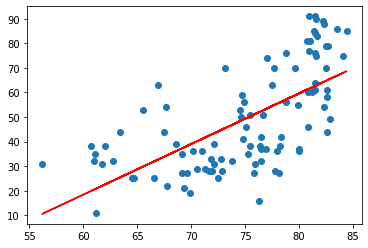

In [65]:
# regreçao simples - y sendo CPI e x sendo LifeExpect
data = data.to_numpy()
y = data[:,14]
x = data[:,8]
X = np.array(x).reshape(-1, 1)
y = np.array(y)
modelo = LinearRegression().fit(X, y)
print(modelo.intercept_)
print (modelo.coef_)
plt.scatter(X, y)
plt.plot(X, modelo.predict(X), color = 'red')
print("O modelo é: y = %.3f + (%.3f)x" %(modelo.intercept_, modelo.coef_))


In [66]:
R2 = r2_score(y, y_pred)
print('R2:', R2)

R2: 0.42478890386662493


-3.6397239899124614
[4.88123321]
O modelo é: y = -3.640 + (4.881)x


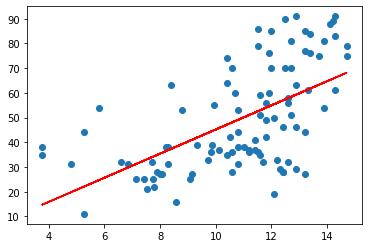

In [67]:
# regressao simples - y sendo CPI e x sendo Happyldx
y = data[:,14]
x = data[:,10]
X = np.array(x).reshape(-1, 1)
y = np.array(y)
modelo = LinearRegression().fit(X, y)
print(modelo.intercept_)
print (modelo.coef_)
plt.scatter(X, y)
plt.plot(X, modelo.predict(X), color = 'red')
print("O modelo é: y = %.3f + (%.3f)x" %(modelo.intercept_, modelo.coef_))

In [68]:
R2 = r2_score(y, y_pred)
print('R2:', R2)

R2: 0.42478890386662493


In [69]:
# regressao multipla
y = data[:,14]
x = data[:,8:9]
#X = np.array(x).reshape(-1, 1)
y = np.array(y)

In [70]:
# modelo de regressão linear múltipla
modelo = LinearRegression().fit(x, y)

y_pred = modelo.predict(x)

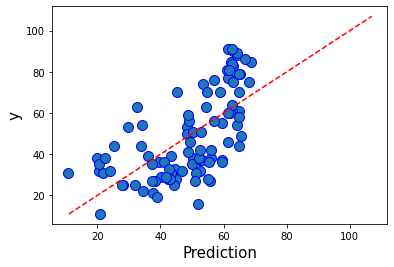

In [71]:
fig = plt.figure()
l = plt.plot(y_pred, y, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra os valores preditos e originais
xl = np.arange(min(y), 1.2*max(y),(max(y)-min(y))/10)

yl = xl
plt.plot(xl, yl, 'r--')
plt.show(True)



In [72]:
R2 = r2_score(y, y_pred)
print('R2:', R2)

R2: 0.42478890386662493
